<a href="https://colab.research.google.com/github/FariaJ65/K-NEAREST-NEIGHBOR./blob/main/Salary_Estimation_using_K_NEAREST_NEIGHBOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)

Mounted at /content/drive


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Preprocessing :
from sklearn.preprocessing import  StandardScaler, LabelEncoder, Normalizer 
#KNN
from sklearn.neighbors import KNeighborsClassifier
#accruacy
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report


In [4]:
# Read datasets
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Salary Estimation.csv")
dataset.shape
dataset.head()


,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [9]:
income_set=set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50K':0, '>50K':1 }).astype(int)
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [10]:
X=dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [11]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [13]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[-0.7754316 , -0.0364557 , -0.14660998,  0.76842222],
       [ 1.27861545, -0.0364557 , -0.14660998, -0.0387662 ],
       [-0.04184337,  1.1287907 , -0.14660998,  0.12267148],
       ...,
       [ 0.69174486,  1.1287907 , -0.14660998, -0.0387662 ],
       [ 2.30563897, -2.36694851, -0.14660998, -0.44236041],
       [-1.21558454, -0.0364557 , -0.14660998, -1.97601841]])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(Y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

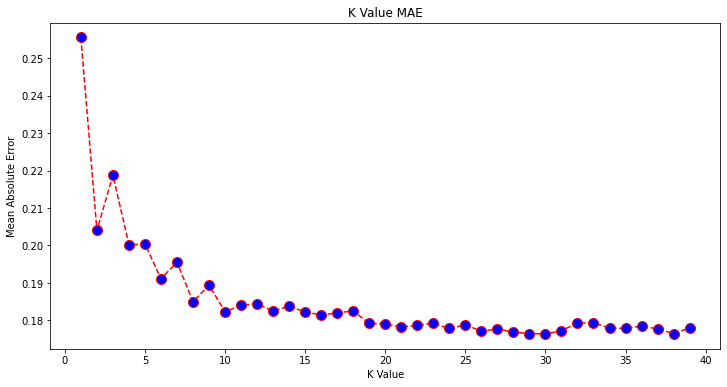

In [16]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=7)

In [18]:
pred = knn.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      6189
           1       0.63      0.45      0.53      1952

    accuracy                           0.80      8141
   macro avg       0.73      0.68      0.70      8141
weighted avg       0.79      0.80      0.79      8141



In [21]:
age=int(input("Enter new employee's age:"))
edu=int(input("Enter new employee's education:"))
cg=int(input("Enter new employee's capital gain:"))
wh=int(input("Enter new employee's hours per week:"))

newEmp=[[age,edu,cg,wh]]
result = knn.predict(sc.transform(newEmp))
print(result)
if result == 1:
  print("employee might get salary above 50K")
else:
  print("employee might not get salary above 50K")



Enter new employee's age:41
Enter new employee's education:10
Enter new employee's capital gain:0
Enter new employee's hours per week:36
[0]
employee might not get salary above 50K
